## Credit Card based Behavioral Clustering
_________________________________

#### Following are the features of the dataset being used:-
- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently    updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

In [1]:
# Importing the necessary packages

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:
# Checking out our data

df = pd.read_csv('project_data.csv')
df = df.drop('CUST_ID', axis = 1) 
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Checking the information regarding our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8637 non-null float64
PRC_FULL_PAYMENT           

In [4]:
# Checking for null values

df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

##### Since there are 313 or 314 empty values in our dataset, we will use the ffill method since each data point is important

In [5]:
# Filling the null values

df.fillna(method ='ffill', inplace = True) 

### EDA

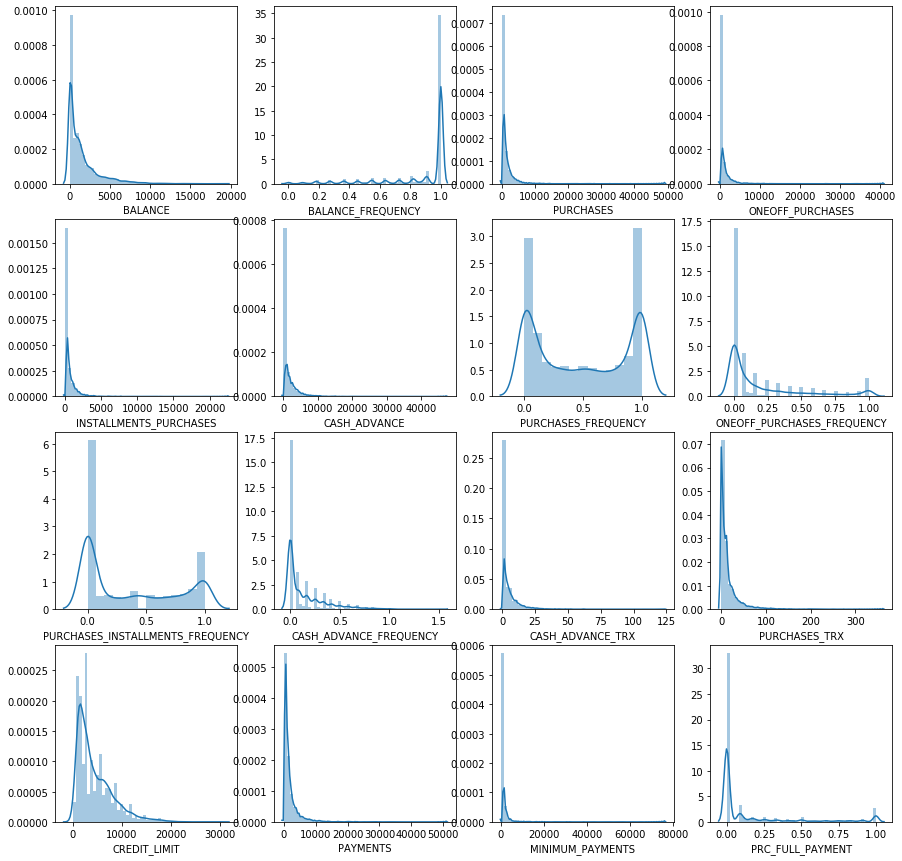

In [6]:
# Checking out the distribution for each feature in the dataset

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
for i in range(4):
    for j in range(4):
        sns.distplot(df[df.columns[4 * i + j]], ax=axs[i,j])
plt.show()

Purchase frequency is BIMODAL, PURCHASE INSTALLMENT FREQUENCY IS BIMODAL, so lots of skewness and kurtosis can also be seen

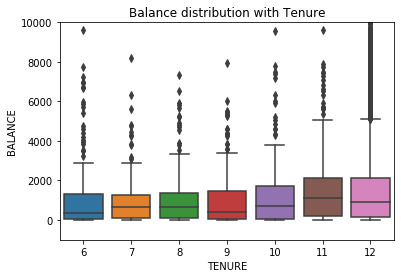

In [7]:
sns.boxplot(x="TENURE", y="BALANCE", data=df)
plt.ylim(-10**3, 10**4)
plt.title('Balance distribution with Tenure');

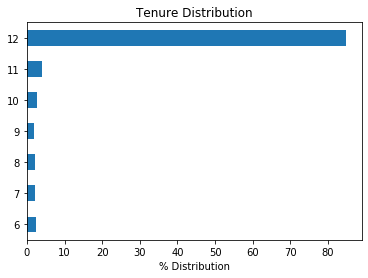

In [8]:
(1e2*df['TENURE'].value_counts().sort_index()/len(df)).plot(kind='barh')
plt.title('Tenure Distribution')
plt.xlabel('% Distribution');

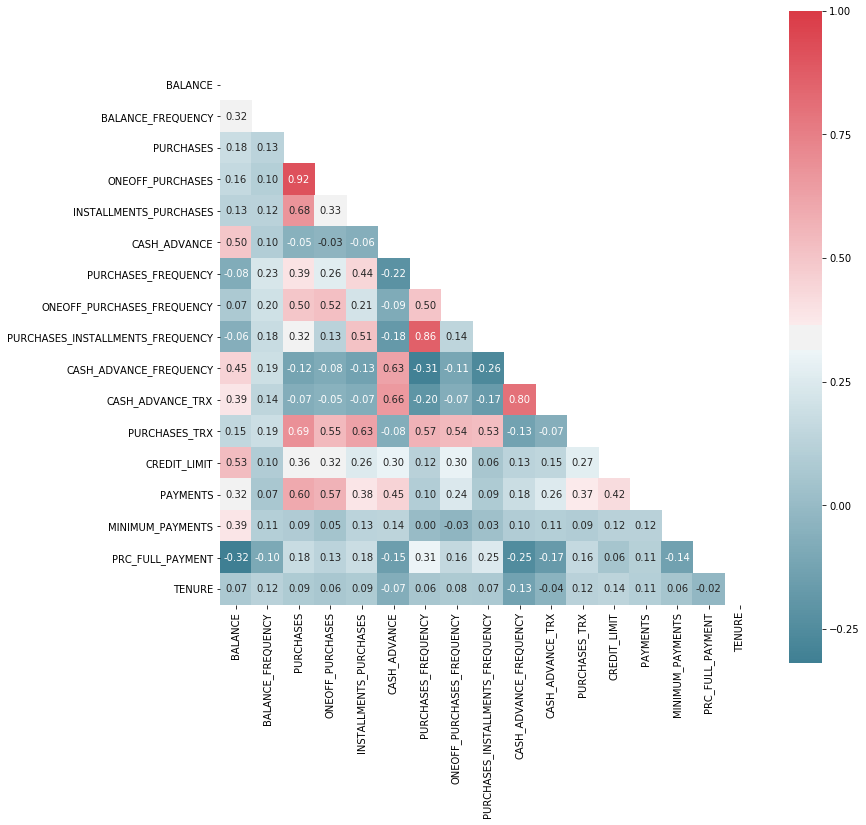

In [9]:
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(),annot = True, mask = mask, fmt = '.2f',square=True, cmap = sns.diverging_palette(220, 10, as_cmap=True));

##### Now that we have analyzed our data with visualizations, lets move on to precprocessing it and getting it ready for our model

### Preprocessing 

In [10]:
# Scaling and Normalizing prior to any operation on the dataset since it has a wide range of values
print(df.skew())

# Collecting column names for later
columns = df.columns

scaler = StandardScaler() 
df = scaler.fit_transform(df) 
   
normalized_df = normalize(df) 
  
# Converting the numpy array into a pandas DataFrame 
df = pd.DataFrame(normalized_df,columns=columns) 

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522590
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.404947
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64


##### We see alot of skewness before normalization

In [11]:
# Taking a look at our data after scaling and normalizing

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435


In [12]:
df.skew()

BALANCE                             1.198663
BALANCE_FREQUENCY                  -1.587806
PURCHASES                           1.413579
ONEOFF_PURCHASES                    2.015996
INSTALLMENTS_PURCHASES              1.765406
CASH_ADVANCE                        1.668469
PURCHASES_FREQUENCY                -0.040730
ONEOFF_PURCHASES_FREQUENCY          1.214232
PURCHASES_INSTALLMENTS_FREQUENCY    0.412647
CASH_ADVANCE_FREQUENCY              0.997827
CASH_ADVANCE_TRX                    1.680762
PURCHASES_TRX                       1.451006
CREDIT_LIMIT                        0.650591
PAYMENTS                            1.658126
MINIMUM_PAYMENTS                    3.732884
PRC_FULL_PAYMENT                    1.607804
TENURE                             -2.442970
dtype: float64

##### Post scaling and normalizing, our data has been preprocessed quite well and the data is good to go for feature selection

##### Now to find the best parameters for the model, we will use 2 different Feature Selection Methods: Fisher's Method and PCA

In [13]:
# Making a copy of our dataset

df1 = df.copy()

### Feature Selection

#### 1. PCA

In [14]:
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
pca_data = pca.fit_transform(df) 
pca_data = pd.DataFrame(pca_data) 
pca_data.columns = ['P1', 'P2'] 
  
pca_data.head(2)

,P1,P2
0,-0.489949,-0.679977
1,-0.519099,0.544825


#### 2. Fisher's Method (Manually coded by me)

### \begin{align}
Score = \frac{\mu_1 -\mu_2}{\sigma_1^2+\sigma_2^2} 
\end{align}

In [15]:
# Creating the function and applying it

def fisher(param):
    u1 = param[:25]
    u2 = param[25:]
    u1m = u1.mean()
    u2m = u2.mean()
    var1 = u1.var()
    var2 = u2.var()
    return u1m,u2m,var1,var2

feature_list = []
for i in range(df1.shape[1]):
    mean1,mean2,var1,var2 = fisher(df1.iloc[:,i])
    feature_list.append([mean1,mean2,var1,var2])

In [16]:
#Checking the score in descending order

list2 = []
i = 0
for elements in feature_list:
    list2.append([(elements[0]-elements[1])/(elements[2]+elements[3]),'{}'.format(columns[i])])
    i += 1
    
list2.sort(reverse = True)

In [17]:
for i in range(len(list2)):
    
    print("{}: {}".format(list2[i][1],list2[i][0]))

PURCHASES: 1.118495112426399
MINIMUM_PAYMENTS: 0.879019086167826
ONEOFF_PURCHASES: 0.8281467874799703
BALANCE: 0.6424610454457573
INSTALLMENTS_PURCHASES: 0.5796742918020517
CREDIT_LIMIT: 0.49218995014715267
TENURE: 0.48355089128081874
PURCHASES_INSTALLMENTS_FREQUENCY: 0.22548964759798676
PURCHASES_FREQUENCY: 0.11104452432996381
BALANCE_FREQUENCY: 0.008221803439860863
PAYMENTS: -0.009544806209132601
CASH_ADVANCE: -0.18851312182312005
PURCHASES_TRX: -0.23008268143938115
ONEOFF_PURCHASES_FREQUENCY: -0.39874170598341063
PRC_FULL_PAYMENT: -0.8602048162666317
CASH_ADVANCE_FREQUENCY: -0.8821114329213485
CASH_ADVANCE_TRX: -1.3470510452564004


##### Highest Fisher's score seen in Purchases and Minimum Payments features

In [18]:
fisher_data = df1[['PURCHASES','MINIMUM_PAYMENTS']]

In [19]:
fisher_data.head(2)

,PURCHASES,MINIMUM_PAYMENTS
0,-0.181129,-0.130160
1,-0.131224,0.024353


### Elbow Method for determining ideal no.of clusters

##### Elbow method for PCA data

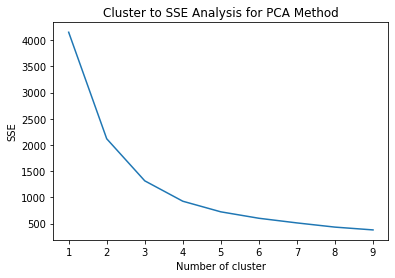

In [20]:
sse_pca = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(pca_data)
    sse_pca[k] = kmeans.inertia_  # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse_pca.keys()), list(sse_pca.values()))
plt.title("Cluster to SSE Analysis for PCA Method")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

##### Elbow method for Fisher's data

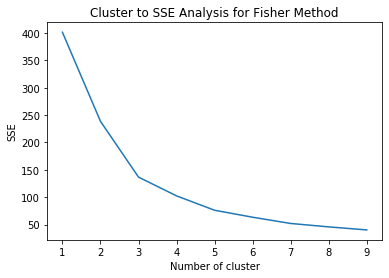

In [21]:
sse_fisher = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(fisher_data)
    sse_fisher[k] = kmeans.inertia_  # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse_fisher.keys()), list(sse_fisher.values()))
plt.title("Cluster to SSE Analysis for Fisher Method")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

##### For both techniques, 3 Clusters gives us the best model

### Silhouette Coefficient Method for determining ideal no.of clusters
#####  Silhouette Coefficient for PCA data

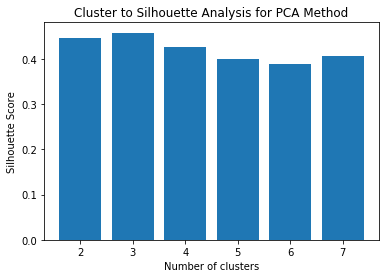

In [21]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(pca_data, KMeans(n_clusters = n_cluster).fit_predict(pca_data))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores)
plt.title("Cluster to Silhouette Analysis for PCA Method")
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

#####  Silhouette Coefficient for Fisher's data 

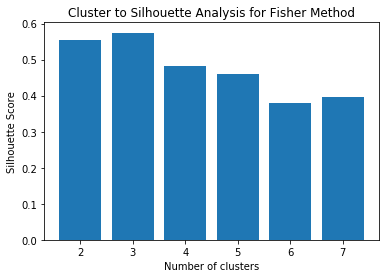

In [22]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(fisher_data, KMeans(n_clusters = n_cluster).fit_predict(fisher_data))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores)
plt.title("Cluster to Silhouette Analysis for Fisher Method")
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

##### As seen with Elbow Method for determining the no. of cluster, for both techniques, 3 Clusters gives us the best model

##### Now to visualize our results

In [23]:
kmeans_pca = KMeans(n_clusters=3).fit_predict(pca_data)

kmeans_fisher = KMeans(n_clusters=3).fit_predict(fisher_data)

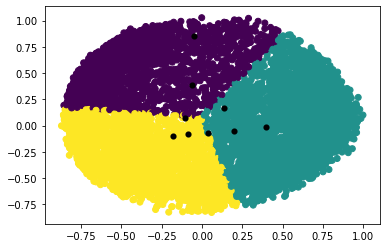

In [24]:
# Visualizing the clusters for PCA data

plt.scatter(pca_data['P1'], pca_data['P2'],  
           c = kmeans_pca) 

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=10, linewidths=3,
            color='black', zorder=10)
plt.show() 

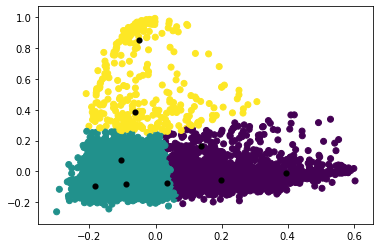

In [25]:
# Visualizing the clusters for Fisher data

plt.scatter(fisher_data['PURCHASES'], fisher_data['MINIMUM_PAYMENTS'],  
           c = kmeans_fisher) 

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=10, linewidths=3,
            color='black', zorder=10)
plt.show() 

### Hierarchial Clustering

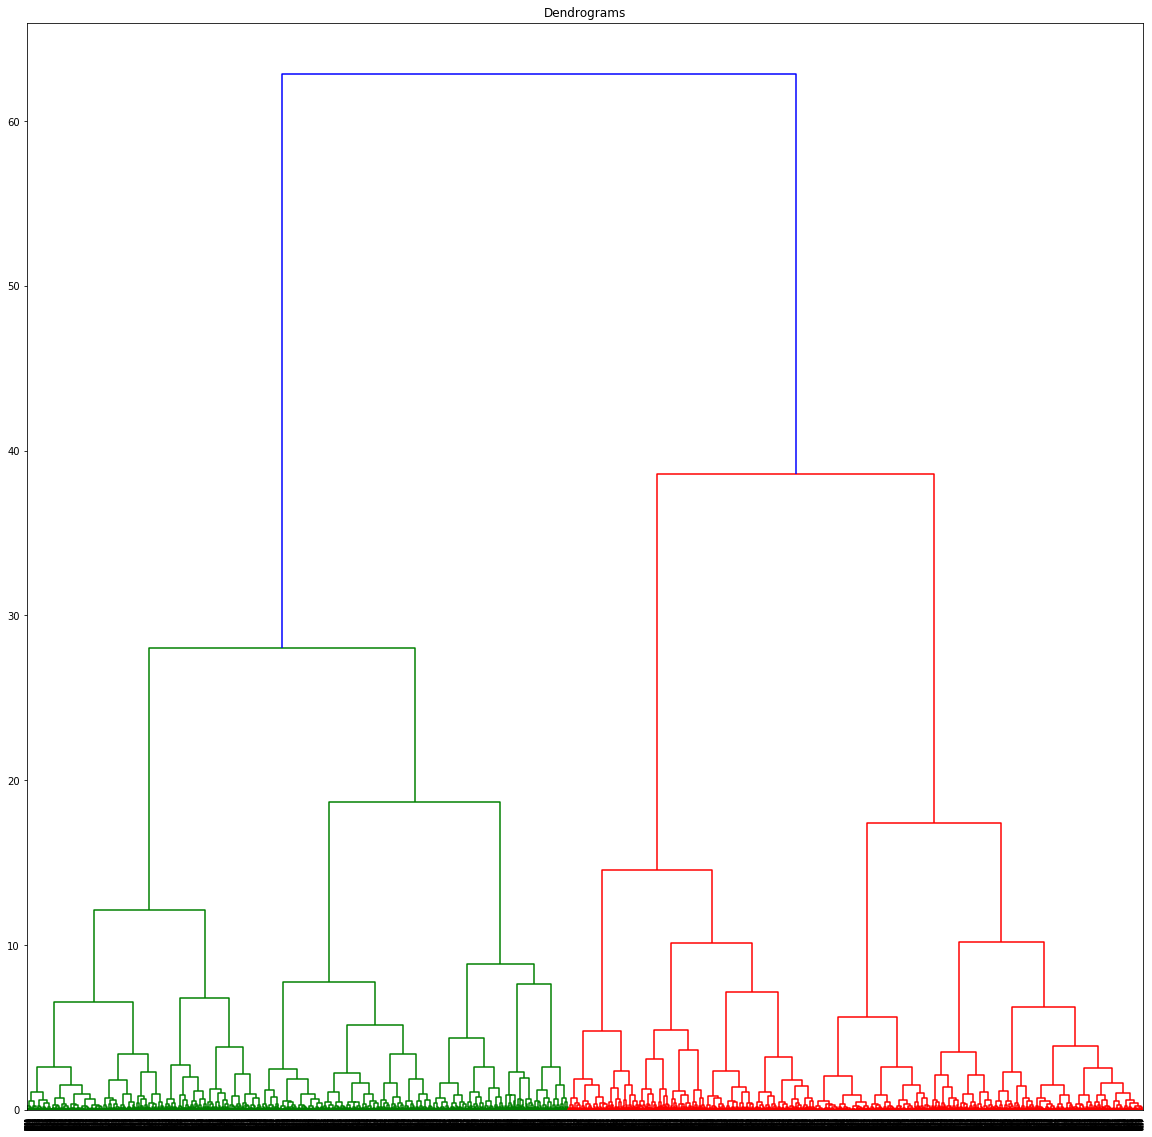

In [26]:
plt.figure(figsize=(20, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(pca_data, method='ward'))

In [27]:
agg_clu = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
agg_clu.fit_predict(pca_data)

array([1, 2, 0, ..., 0, 1, 2], dtype=int64)

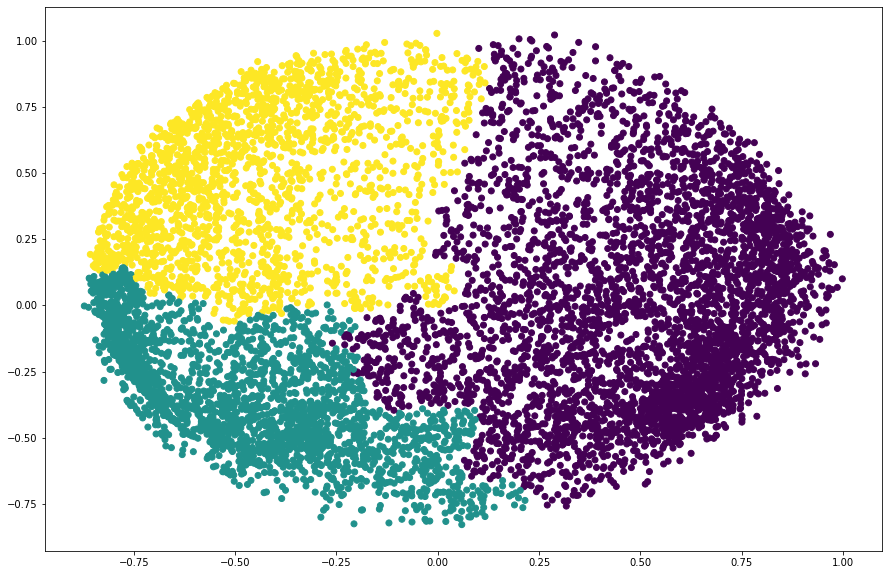

In [28]:
plt.figure(figsize=(15, 10))  
plt.scatter(pca_data['P1'], pca_data['P2'], c= agg_clu.labels_ ); 